$\textbf{CIRUS KALUGANA}$
<br>
$\textbf{Tulane University}$
<br>
<br>
$\textbf{Data Science Course Final Project}$
<br>
$\textbf{Project Milestone 1}$
<br>
<br>
$\textbf{10/14/2022}$
<br>
<br>
This project can be found on my GitHub page at [kalucira.github.io](https://github.com/kalucira/kalucira.github.io)

$\textbf{Project Goals:}$

The goal of this project is to investigate/explore the temporal and spatial distribution of large magnitude earthquakes (moment magnitude Mw > 6) around the globe more specifically around the Plate boundaries from 2000 - 2022, and be able to infer if we can use machine learning to predict regions where large earthquakes will likely occur and an approximate time frame when it will occur.
<br>
<br>
In this project I will be working alone as required for graduate students and do hope to be working on it whenever time is available as planned.
<br>
<br>
This project requires data about the earthquakes and it was obtained from the data management centre called [Incorporated Research Institutions for Seismology - IRIS](https://service.iris.edu/).
<br>
The data can be acquired directly by sending a query using [here](http://service.iris.edu/fdsnws/event/1/) , but I chose to use an easy way of downloading it using an Observational Python library called [ObsPy](https://docs.obspy.org/) code as shown in the following cells.
<br>
<br>
$\textbf{Project Explanations:}$

This data contains four aspects of the earthquake that is the earthquake magnitude, location (latitude and longitude), time and depth at which it occured. The data set comes as a catalog, a default ObsPy format but can be converted into a pandas `DataFrame` format.
<br>
<br>
The data catalog is first plotted to take a look at how the earthquakes are distributed around the globe. It is then read into a `DataFrame` format and the times column seperated into year and actual time of occurence which enables studying the temporal distribution over years' period.
<br>
<br>
The data is to be divided into the major regions of the plate boundaries such as Western Coast of North America, Western Coast of South America, New Zealand Subduction, e.t.c. where either the plates are seperating or converging (subducting) as these earthquakes are mainly from those regions and the earthquakes will be studied basing on the each of the regions and the relationships between them.

In [ ]:
# Installing the required softwares and libraries
# !pip install geopandas
!pip install obspy ;
!grep '^deb ' /etc/apt/sources.list | \
  sed 's/^deb /deb-src /g' | \
  tee /etc/apt/sources.list.d/deb-src.list ;
!apt-get update

!apt-get -qq build-dep python3-cartopy
!apt-get -qq remove python-shapely python3-shapely

!pip install --no-binary shapely shapely --force
!pip install --no-binary cartopy cartopy==0.17.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
deb-src http://archive.ubuntu.com/ubuntu/ bionic main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates main restricted
deb-src http://archive.ubuntu.com/ubuntu/ bionic universe
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates universe
deb-src http://archive.ubuntu.com/ubuntu/ bionic multiverse
deb-src http://archive.ubuntu.com/ubuntu/ bionic-updates multiverse
deb-src http://archive.ubuntu.com/ubuntu/ bionic-backports main restricted universe multiverse
deb-src http://security.ubuntu.com/ubuntu/ bionic-security main restricted
deb-src http://security.ubuntu.com/ubuntu/ bionic-security universe
deb-src http://security.ubuntu.com/ubuntu/ bionic-security multiverse
deb-src https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/
deb-src https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64/ /
Get:1 http://security.ubuntu.com/ubun

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The below command helps to ignore warmimgs which may arise as result of running sme codes

In [ ]:
%pylab inline
#let's ignore all the warnings
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


Importing the required libraries

In [ ]:
from obspy.clients.fdsn.client import Client
from obspy import Stream, UTCDateTime
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import numpy as np
import pandas as pd
import os
import pprint
import cartopy

The data is downloaded using the codes below using the Client with the server as [FDSN](https://www.fdsn.org/networks/?paginate=no)  under IRIS data management centre. The time period and minimum magnitude of earthquake are specified to obtain the data.

In [ ]:
client_global = Client("IRIS")

starttime = UTCDateTime(2000, 1, 1, 0, 0)
endtime = UTCDateTime(2022, 5, 10, 23, 59)
minmag = 6

cat1 = client_global.get_events(starttime, endtime, minmagnitude=minmag)                    
print(cat1)

3388 Event(s) in Catalog:
2022-05-10T23:06:32.538000Z | -23.496,  -66.652 | 6.8  mww
2022-05-09T22:33:06.817000Z |  -3.352, +146.360 | 6.3  mww
...
2000-01-05T07:40:36.730000Z | -11.322, +165.378 | 6.1  Mw
2000-01-01T05:58:20.040000Z | -60.680, +153.659 | 6.0  Mw
To see all events call 'print(CatalogObject.__str__(print_all=True))'


The catalog is plotted to take a see the events distribution on the world map

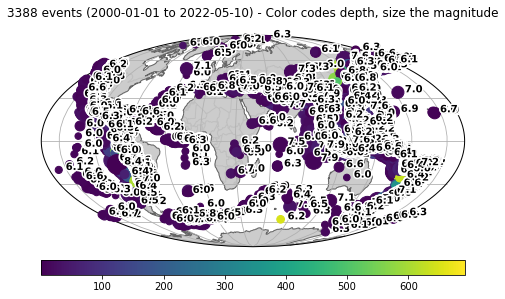

In [ ]:
cat_plot = cat1.plot(method='cartopy')

The required data from the catalog is then extracted as below

In [ ]:
magnitudes = [event.magnitudes[0].mag for event in cat1]
times = [event.origins[0].time.datetime for event in cat1]
depths = [event.origins[0].depth for event in cat1]
Latitudes = [event.origins[0].latitude for event in cat1]
Longitudes = [event.origins[0].longitude for event in cat1]

In [ ]:
DataEQ = pd.DataFrame ({'magnitudes':magnitudes, 'times':times, 'depths':depths, 'Latitudes':Latitudes, 'Longitudes':Longitudes}, 
                   columns = ['magnitudes','times','depths','Latitudes','Longitudes'])
DataEQ


,magnitudes,times,depths,Latitudes,Longitudes
0,6.8,2022-05-10 23:06:32.538,220000.0,-23.4960,-66.6519
1,6.3,2022-05-09 22:33:06.817,10000.0,-3.3520,146.3603
2,6.3,2022-05-09 06:23:03.133,27020.0,24.0222,122.5011
3,6.0,2022-05-05 08:21:15.666,18000.0,6.5295,127.1315
4,6.1,2022-04-28 13:21:13.122,10000.0,-3.9148,146.6901
...,...,...,...,...,...
3383,6.4,2000-01-08 01:19:42.080,2700.0,-9.8640,159.9260
3384,6.2,2000-01-06 21:31:04.470,19000.0,16.1160,119.3930
3385,6.1,2000-01-06 10:42:25.330,1000.0,58.1340,-136.9340
3386,6.1,2000-01-05 07:40:36.730,5600.0,-11.3220,165.3780


The times column data is seperated into actual time of occurence and the year.

In [ ]:
DataEQ['time'] = pd.DatetimeIndex(DataEQ['times']).time
DataEQ['year'] = pd.DatetimeIndex(DataEQ['times']).year
DataEQ['year'] = DataEQ['year'].astype('datetime64[ns]')
DataEQ.head()

,magnitudes,times,depths,Latitudes,Longitudes,time,year
0,6.8,2022-05-10 23:06:32.538,220000.0,-23.4960,-66.6519,23:06:32.538000,1970-01-01 00:00:00.000002022
1,6.3,2022-05-09 22:33:06.817,10000.0,-3.3520,146.3603,22:33:06.817000,1970-01-01 00:00:00.000002022
2,6.3,2022-05-09 06:23:03.133,27020.0,24.0222,122.5011,06:23:03.133000,1970-01-01 00:00:00.000002022
3,6.0,2022-05-05 08:21:15.666,18000.0,6.5295,127.1315,08:21:15.666000,1970-01-01 00:00:00.000002022
4,6.1,2022-04-28 13:21:13.122,10000.0,-3.9148,146.6901,13:21:13.122000,1970-01-01 00:00:00.000002022


A simple exploratory study is taken to identify how the data is distributed and or determine possible relationships.

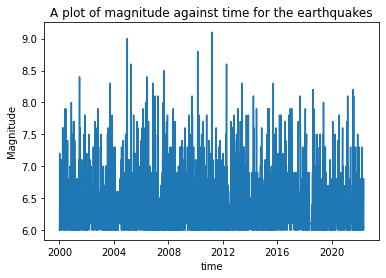

In [ ]:
plt.title('A plot of magnitude against time for the earthquakes')
plt.xlabel('time')
plt.ylabel('Magnitude') 
plt.plot(times,magnitudes)
plt.show()

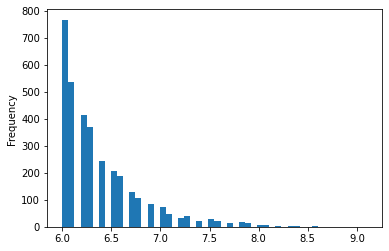

In [ ]:
DataEQ['magnitudes'].plot.hist(bins=50)

In [ ]:
DataEQ['magnitudes'].mean()

6.381726682408501

In [ ]:
DataEQ['magnitudes'].max()

9.1

In [ ]:
DataEQ['depths'].max()

692100.0

In [ ]:
DataEQ['depths'].median()

28200.0

In [ ]:
DataEQ['depths'].median()

28200.0